# lab 2 Amelin Viacheslav IP-05
Develop an intelligent agent-machine that moves along the graph-path from the previous laboratory work according to the given rules and goal. Gain practical skills in working with intelligent agents.

In [542]:
import networkx as nx
import matplotlib.pyplot as plt
import random

#### Size road

In [543]:
size = 3
delete = 4

#### Check Error

In [544]:
if(size < 2):
    raise ValueError("size must be greater than 1")
maxDelete = (2**(size-1)) + 2
if(maxDelete < delete):
    raise ValueError(f"removal should be no more than, {maxDelete}")

## Algorithm
  

#### Creating and modifying a graph

In [545]:
G = nx.grid_2d_graph(size, size)

count = 0
nodeList = list(G.nodes())

while count < delete:
    randomEdgeCol = random.randint(-1, 1)
    randomEdgeRow = random.randint(-1, 1)
    
    randomNode = random.choice(nodeList)
    nodeCol, nodeRow = randomNode[0] + randomEdgeCol, randomNode[1] + randomEdgeRow
    
    if(G.has_edge(randomNode, (nodeCol, nodeRow))): 
        G.remove_edge(randomNode, (nodeCol, nodeRow))
        if not nx.is_connected(G):
            G.add_edge(randomNode, (nodeCol, nodeRow))
        else: count += 1

#### Load graph

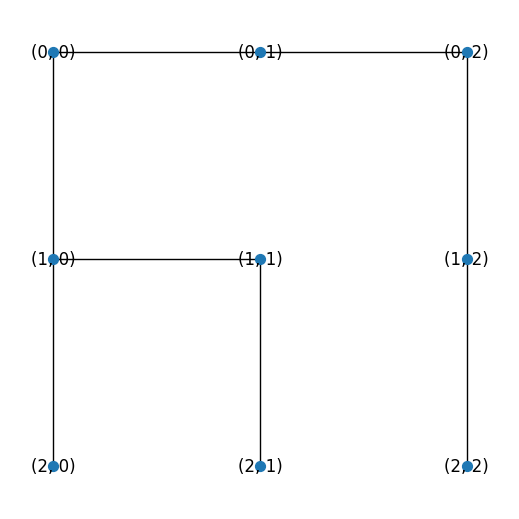

In [546]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)

#### Enter start and end coordinates

In [547]:
start_cord = (0, 0)
end_cord = (2, 2)

#### Check Error

In [548]:
if((size, size) <= end_cord and (size, size) <= start_cord):
  raise ValueError(f"Should be less {size}")

if(end_cord > (0, 0) and start_cord > (0, 0)):
  raise ValueError("Must be greater than zero")

### Agent

In [549]:


def agent(G, start_cord, end_cord):
  visited = (start_cord, )
  path = [start_cord]
 
  while path[-1] != end_cord:
    next_nodes = G.adj[path[-1]]
    best = None

    for node in list(next_nodes): 
      if node == end_cord:
        path.append(node)
        return path, visited
      elif node not in visited:
        if best is None or abs(node[0] - end_cord[0]) + abs(node[1] - end_cord[1]):
          best = node

    if best is None:
      path.pop()
    else:
      path.append(best)
      visited += (best,)

    print(*path, sep = ' => ')
    #print('list: ', list(next_nodes))
    #print('Path: ', path, '\nVis: ',visited)

  #nodeList = list(G.nodes)
  #edgesList = list(G.edges)
  #print(nodeList, '\n' ,edgesList)

print(agent(G, start_cord, end_cord))



(0, 0) => (0, 1)
(0, 0) => (0, 1) => (0, 2)
(0, 0) => (0, 1) => (0, 2) => (1, 2)
([(0, 0), (0, 1), (0, 2), (1, 2), (2, 2)], ((0, 0), (0, 1), (0, 2), (1, 2)))


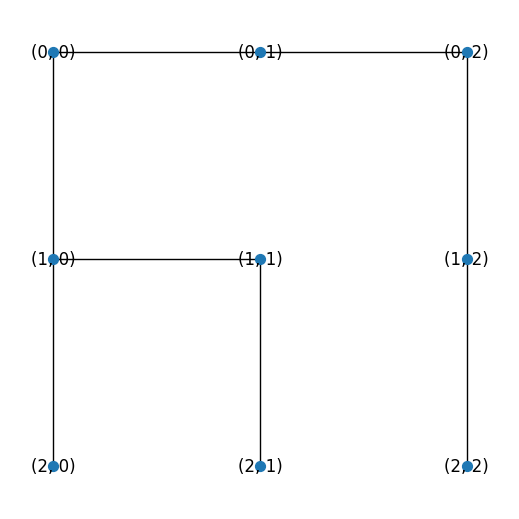

In [550]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)